In [39]:
import pickle

with open('X_train_music.pkl', 'rb') as f:
    X_train_music = pickle.load(f)
with open('X_train_graph.pkl', 'rb') as f:
    X_train_graph = pickle.load(f)
with open('X_train_gas.pkl', 'rb') as f:
    X_train_gas = pickle.load(f)

with open('X_test_music.pkl', 'rb') as f:
    X_test_music = pickle.load(f)
with open('X_test_graph.pkl', 'rb') as f:
    X_test_graph = pickle.load(f)
with open('X_test_gas.pkl', 'rb') as f:
    X_test_gas = pickle.load(f)

with open('y_test_music.pkl', 'rb') as f:
    y_test_music = pickle.load(f)
with open('y_test_graph.pkl', 'rb') as f:
    y_test_graph = pickle.load(f)
with open('y_test_gas.pkl', 'rb') as f:
    y_test_gas = pickle.load(f)

with open('methods_music.pkl', 'rb') as f:
    methods_music = pickle.load(f)
with open('methods_graph.pkl', 'rb') as f:
    methods_graph = pickle.load(f)
with open('methods_gas.pkl', 'rb') as f:
    methods_gas = pickle.load(f)
    
with open('mutual_informations_music.pkl', 'rb') as f:
    mutual_informations_music = pickle.load(f)
with open('mutual_informations_graph.pkl', 'rb') as f:
    mutual_informations_graph = pickle.load(f)
with open('mutual_informations_gas.pkl', 'rb') as f:
    mutual_informations_gas = pickle.load(f)
    
with open('X_test_tsne_music.pkl', 'rb') as f:
    X_test_tsne_music = pickle.load(f)
with open('X_test_tsne_gas.pkl', 'rb') as f:
    X_test_tsne_gas = pickle.load(f)
with open('nmf_emb_test_graph.pkl', 'rb') as f:
    nmf_emb_test_graph = pickle.load(f)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn_extra.cluster import KMedoids
from matplotlib.colors import ListedColormap

from matplotlib.lines import Line2D
from sklearn.manifold import TSNE


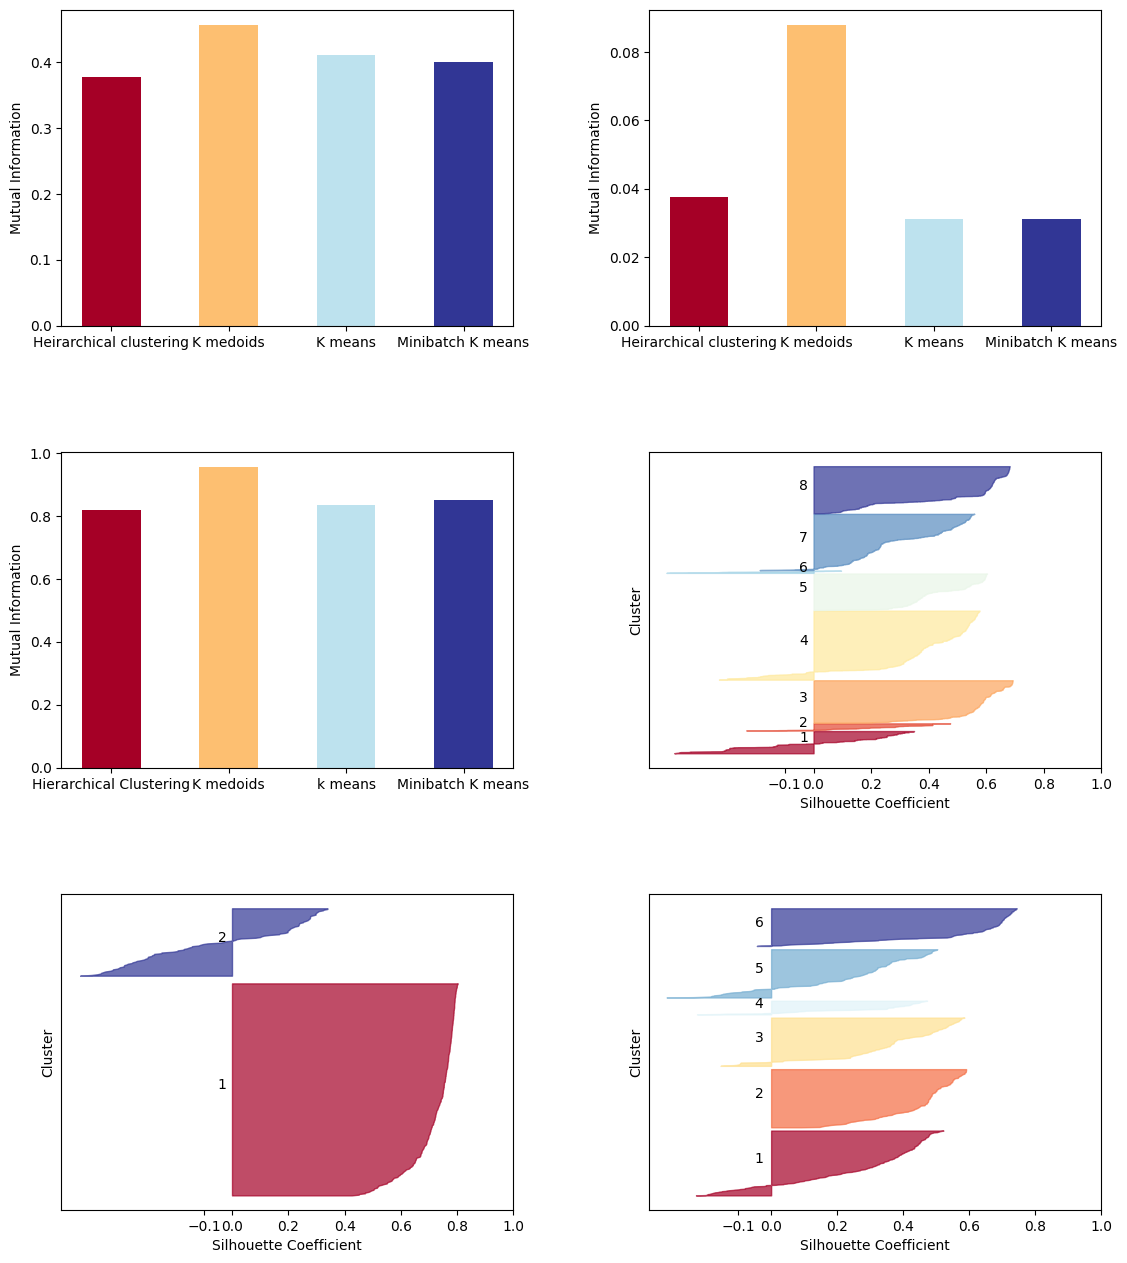

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 15))


# Create a grid of subplots with 3 rows and 2 columns
plt.subplot(3, 2, 1)
cmap = plt.get_cmap('RdYlBu')

mutual_informations = mutual_informations_music
labels = methods_music

plt.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

#Add labels and title
plt.ylabel('Mutual Information')
plt.tick_params(axis='x', labelrotation=0, labelsize=10)

plt.subplot(3, 2, 2)
cmap = plt.get_cmap('RdYlBu')

mutual_informations = mutual_informations_graph
labels = methods_graph

plt.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

#Add labels and title
plt.ylabel('Mutual Information')
plt.tick_params(axis='x', labelrotation=0, labelsize=10)

plt.subplot(3, 2, 3)
cmap = plt.get_cmap('RdYlBu')

mutual_informations = mutual_informations_gas
labels = methods_gas

plt.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

#Add labels and title
plt.ylabel('Mutual Information')
plt.tick_params(axis='x', labelrotation=0, labelsize=10)

plt.subplot(3, 2, 4)
k = 8
data = X_test_music
labels = y_test_music

# Create KMedoids model with k clusters
model = KMedoids(n_clusters=k, random_state=42)
model.fit(data)
    
# Get cluster labels and compute silhouette scores
cluster_labels = model.labels_
silhouette_avg = silhouette_score(data, cluster_labels)
silhouette_values = silhouette_samples(data, cluster_labels)
    
# Set up colormap and plot silhouette scores
cmap = ListedColormap(plt.cm.RdYlBu(np.linspace(0, 1, k)))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cmap(i)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10
    
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

plt.subplot(3, 2, 5)
k = 2
data = X_test_graph
labels = y_test_graph

# Create KMedoids model with k clusters
model = KMedoids(n_clusters=k, random_state=42)
model.fit(data)
    
# Get cluster labels and compute silhouette scores
cluster_labels = model.labels_
silhouette_avg = silhouette_score(data, cluster_labels)
silhouette_values = silhouette_samples(data, cluster_labels)
    
# Set up colormap and plot silhouette scores
cmap = ListedColormap(plt.cm.RdYlBu(np.linspace(0, 1, k)))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cmap(i)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10
    
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

plt.subplot(3, 2, 6)
k = 6
data = X_test_gas
labels = y_test_gas

# Create KMedoids model with k clusters
model = KMedoids(n_clusters=k, random_state=42)
model.fit(data)
    
# Get cluster labels and compute silhouette scores
cluster_labels = model.labels_
silhouette_avg = silhouette_score(data, cluster_labels)
silhouette_values = silhouette_samples(data, cluster_labels)
    
# Set up colormap and plot silhouette scores
cmap = ListedColormap(plt.cm.RdYlBu(np.linspace(0, 1, k)))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cmap(i)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10
    
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.4)

plt.savefig('MI_silhouette_subplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


C:\Users\yuval\AppData\Local\Temp\ipykernel_23760\2196637801.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#f56d43" if x== 1 else "#75acd2" for x in list(y_test[0:l])], norm=normalize, s=40, label='Ground truth')
C:\Users\yuval\AppData\Local\Temp\ipykernel_23760\2196637801.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#a50126" if x== 1 else "#313694" for x in list(clusters_kmedoids[0:l])], norm=normalize, s=1, label='Model generated')
C:\Users\yuval\AppData\Local\Temp\ipykernel_23760\2196637801.py:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_cmap = plt.cm.get_cmap(cmap, le

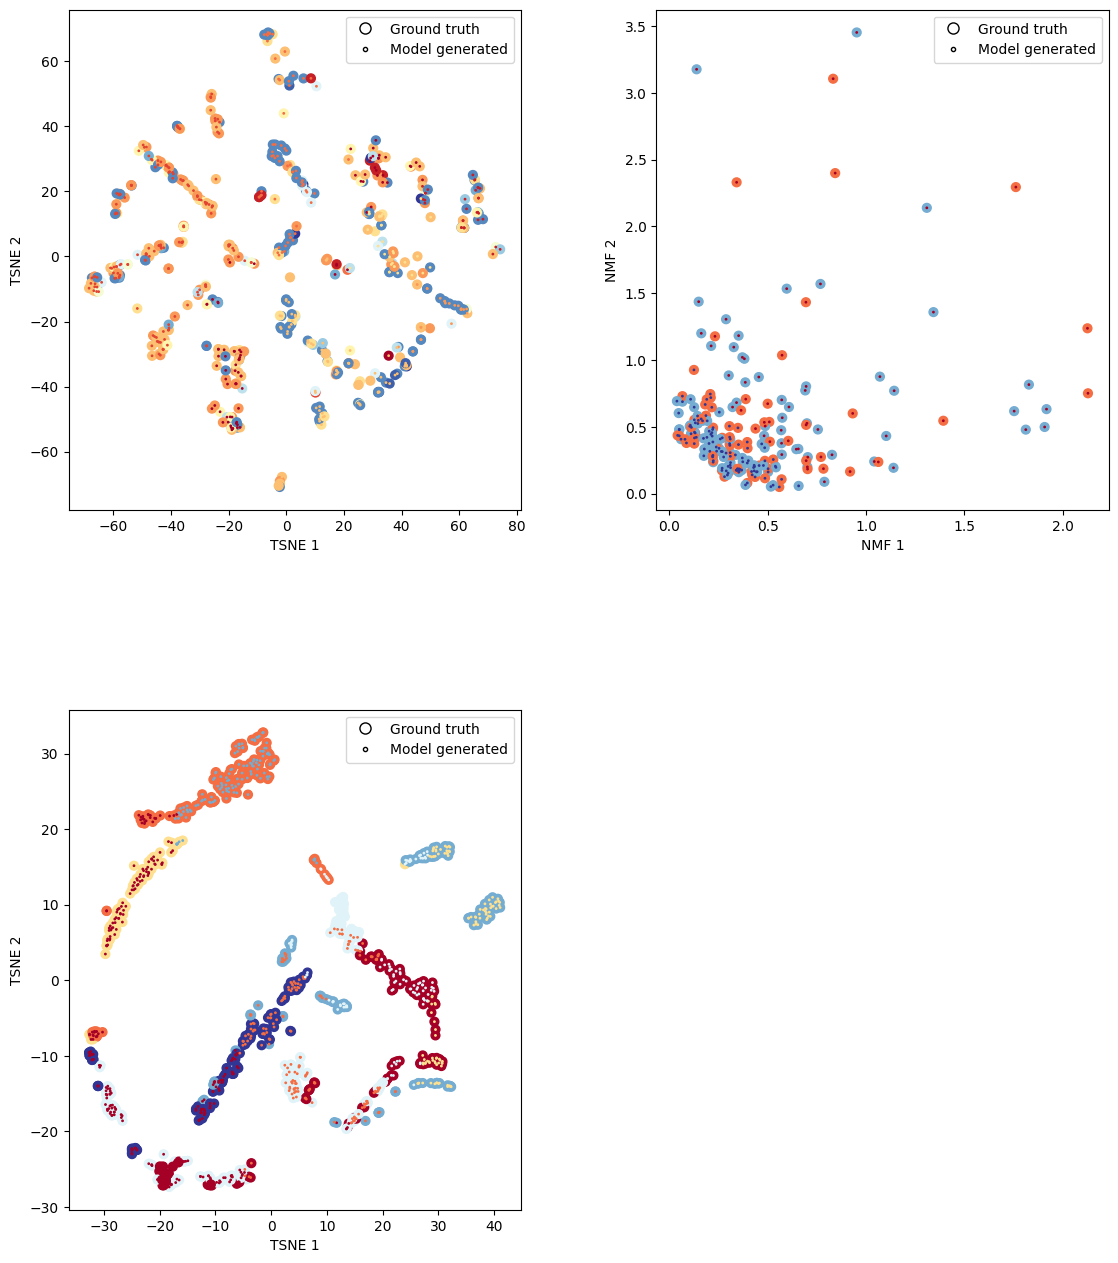

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 15))


plt.subplot(2, 2, 1)
X_train = X_train_music
X_test = X_test_music
y_test = y_test_music
k = 8
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

X_test_tsne = X_test_tsne_music

cmap = "RdYlBu"
l = 500
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=[int(x) for x in list(y_test[0:l])], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_kmedoids[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]
plt.legend(handles=legend_elements, loc='upper right')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

#####
plt.subplot(2, 2, 2)
X_train = X_train_graph
X_test = X_test_graph
y_test = y_test_graph
k = 2
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

nmf_emb_test = nmf_emb_test_graph

cmap = "RdYlBu"
l = 200
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#f56d43" if x== 1 else "#75acd2" for x in list(y_test[0:l])], norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#a50126" if x== 1 else "#313694" for x in list(clusters_kmedoids[0:l])], norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create a new color map using only the unique colors
#new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))

# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper right')

# Add labels and title
plt.xlabel('NMF 1')
plt.ylabel('NMF 2')
#####
plt.subplot(2, 2, 3)
X_train = X_train_gas
X_test = X_test_gas
y_test = y_test_gas
k = 6
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

X_test_tsne = X_test_tsne_gas

cmap = "RdYlBu"
l = 904
normalize = plt.Normalize(vmin=np.min(y_test["Gas"]), vmax=np.max(y_test["Gas"]))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=[int(x) for x in list(y_test[0:l]["Gas"])], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_kmedoids[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create a new color map using only the unique colors
new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))


# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper right')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
####
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.4)

plt.savefig('final_plot_subplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
